# Geometric data manipulations

Here we demonstrate some of the most common geometry manipulation functions available in geopandas. We will use country borders from Africa as our example data. It is often useful to do geometric manipulations on administrative borders for further analysis and visualization purposes. We will learn how to generate centroids, different outlines and buffer zones for the country polygons. 

Geopandas comes with some ready-to-use data for country borders from [Natural Earth](https://www.naturalearthdata.com/) which we will use here. 

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
from pathlib import Path

data = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
data.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


Let's continue with only the African continent.

In [2]:
data = data.loc[data["continent"]=='Africa'].copy()

For the purposes of geometric manipulations, we are mainly interested in the geometry column which contains the polygon geometries. Remember, that the data type of the geometry-column is `GeoSeries`. Individual geometries are eventually shapely objects and we can use all of shapely's tools for geometry manipulation directly via geopandas.

In [3]:
# Check contents of the geometry column
data["geometry"].head()

1     POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...
2     POLYGON ((-8.66559 27.65643, -8.66512 27.58948...
11    POLYGON ((29.34000 -4.49998, 29.51999 -5.41998...
12    POLYGON ((41.58513 -1.68325, 40.99300 -0.85829...
13    POLYGON ((39.20222 -4.67677, 37.76690 -3.67712...
Name: geometry, dtype: geometry

In [4]:
# Check data type of the geometry column
type(data["geometry"])

geopandas.geoseries.GeoSeries

In [5]:
# Check data type of a value in the geometry column
type(data["geometry"].values[0])

shapely.geometry.polygon.Polygon

Let's first plot the original geometries. We can use the in-built plotting function in geopandas to plot the geometries, and `matplotlib.pyplot` to turn off axis lines and labels.

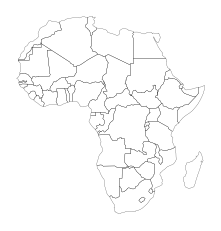

In [6]:
data.plot(facecolor="none", linewidth=0.2)

plt.axis("off")
plt.show()

## Centroid

Extracting the centroid of geometric features is useful in many cases. Geometric centroid can, for example, be used for locating text labels in visualizations. We can extract the center point of each polygon via the `centroid`-attribute of the geometry-column. 

In [7]:
data["geometry"].centroid.head()

C:\Users\vuokkhei\AppData\Local\Temp/ipykernel_10684/2055797465.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  data["geometry"].centroid.head()


1      POINT (34.75299 -6.25773)
2     POINT (-12.13783 24.29117)
11     POINT (23.58296 -2.85028)
12      POINT (45.72670 4.75235)
13      POINT (37.79156 0.59597)
dtype: geometry

We can also apply the method directly to the `GeoDataFrame` to achieve the same result.

In [8]:
data.centroid.head()

C:\Users\vuokkhei\AppData\Local\Temp/ipykernel_10684/1275436188.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  data.centroid.head()


1      POINT (34.75299 -6.25773)
2     POINT (-12.13783 24.29117)
11     POINT (23.58296 -2.85028)
12      POINT (45.72670 4.75235)
13      POINT (37.79156 0.59597)
dtype: geometry

Notice that geopandas warns us that we are trying to calculate centroids based on a geographic CRS and that our results are likely incorrect. Let's check what is the CRS definition of our data.

In [9]:
data.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Our data are indeed in a geographic coordinate reference system WGS 84 (EPSG:4326). In order to get valid centroids, we should re-project the data to a projected coordinate reference system.

We can then plot the centroids for a visual check.

C:\Users\vuokkhei\AppData\Local\Temp/ipykernel_10684/2496456677.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  data.centroid.plot(markersize=0.1)


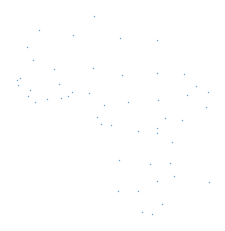

In [10]:
data.centroid.plot(markersize=0.1)

plt.axis("off")
plt.show()

## Unary union

We can generate a joint outline for African countries represented in the Natural Earth data through creating a geometric union among all geometries. This could be useful, for example, for visualizing the outlines of a study area. The `unary_union` returns a single geometry object, which is automatically visualized when running the code in a Jupyter Notebook.

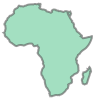

In [11]:
data.unary_union

In [12]:
type(data.unary_union)

shapely.geometry.multipolygon.MultiPolygon

## Simplifying geometries

Geometry simplification is a useful process especially when visualizing data that has very detailed geometry. With our sample data, we can generate simplified version of the outline extent. The tolerance parameter controls the level of simplification.

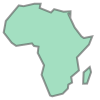

In [13]:
data.unary_union.simplify(tolerance=1)

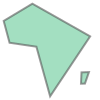

In [14]:
data.unary_union.simplify(tolerance=10)

## Bounding polygon

Bounding polygons are useful in many cases for describing the approximate extent of geographic data. A minimum bounding rectangle, also called a bounding box or an envelope is the smallest rectangular polygon surrounding a geometric object. In a `GeoDataFrame`, the `envelope` attribute returns the bounding rectangle for each geometry.

In [15]:
data.envelope.head()

1     POLYGON ((29.34000 -11.72094, 40.31659 -11.720...
2     POLYGON ((-17.06342 20.99975, -8.66512 20.9997...
11    POLYGON ((12.18234 -13.25723, 31.17415 -13.257...
12    POLYGON ((40.98105 -1.68325, 51.13387 -1.68325...
13    POLYGON ((33.89357 -4.67677, 41.85508 -4.67677...
dtype: geometry

In order to get the bounding rectangle for the whole layer, we  first create an union of all geometries using `unary_union`, and then create the bounding rectangle for that polygon.

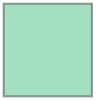

In [16]:
data.unary_union.envelope

Corner coordinates of the bounding box for a `GeoDataFrame` can be fetched via the `total_bounds` attribute. The `bounds` attribute returns the bounding coordinates of each feature.

In [17]:
data.total_bounds

array([-17.62504269, -34.81916636,  51.13387   ,  37.34999441])

In [18]:
data.bounds.head()

,minx,miny,maxx,maxy
1,29.339998,-11.720938,40.316590,-0.950000
2,-17.063423,20.999752,-8.665124,27.656426
11,12.182337,-13.257227,31.174149,5.256088
12,40.981050,-1.683250,51.133870,12.024640
13,33.893569,-4.676770,41.855083,5.506000


### Convex hull

A bit more detailed delineation of the data extent can be extracted using a convex hull which represents the smalles possible polygon that contains all points in an object. If we apply the convex hull method on the whole `GeoDataFrame`, we will get a GeoSeries containing a convex hull for each polygon separately.

In [19]:
data.convex_hull.head()

1     POLYGON ((36.51408 -11.72094, 34.55999 -11.520...
2     POLYGON ((-17.06342 20.99975, -17.02043 21.422...
11    POLYGON ((29.69961 -13.25723, 28.93429 -13.248...
12    POLYGON ((41.58513 -1.68325, 40.99300 -0.85829...
13    POLYGON ((39.20222 -4.67677, 37.76690 -3.67712...
dtype: geometry

In order to create a covex hull for the whole extent, we need to first create an union of all polygons. 

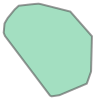

In [20]:
data.unary_union.convex_hull

## Buffer

Buffering is a common spatial operation that has a multitude of use cases in spatial analyses. For example, in transport network analyses, it is good to fetch the transport network also from outside the study area in order to capture routes that go beyond the study area border. 

The distance parameter in the `buffer` function defines the radius or the buffer (according to the coordinate reference system of the data).

In [25]:
# 5 km buffer for the travel time matrix extent
data.buffer(5).head()

C:\Users\vuokkhei\AppData\Local\Temp/ipykernel_10684/583415399.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  data.buffer(5).head()


1     POLYGON ((24.44038 -5.49760, 24.43302 -5.45999...
2     POLYGON ((-18.15733 26.29049, -17.95773 26.600...
11    POLYGON ((7.91933 -3.18689, 8.00505 -2.99403, ...
12    POLYGON ((40.79639 9.04722, 40.99081 9.18493, ...
13    POLYGON ((29.40372 2.29487, 29.39824 2.30625, ...
dtype: geometry



## Dissolving and merging geometries

Data aggregation refers to a process where we combine data into groups. Spatial data aggregation refers to combining geometries into coarser spatial units based on some attributes. The process may also include the calculation of summary statistics. 

In pandas, we learned how to group and aggregate data using the `groupby`method. In geopandas, there is a function called `dissolve()` that groups the data based on an anttribute column and unions the geometries for each group in that attribute. 

Here we will conduct a simple dissolve operation through combining national borders by continent.

In [22]:
# Conduct the aggregation
dissolved = data.dissolve(by="continent")

# Check the result
dissolved

,geometry,pop_est,name,iso_a3,gdp_md_est
continent,,,,,
Africa,"MULTIPOLYGON (((-11.43878 6.78592, -11.70819 6...",53950935,Tanzania,TZA,150600.0


The column used for dissolving the data can now be found in the index.

In [23]:
dissolved.index

Index(['Africa'], dtype='object', name='continent')

The dissolved data should have as many rows of data as there were unique values in the column - one row for each unique value. Let's compare the number of cells in the layers before and after the aggregation.

In [24]:
print("Rows in original intersection GeoDataFrame:", len(data))
print("Rows in dissolved layer:", len(dissolved))

Rows in original intersection GeoDataFrame: 51
Rows in dissolved layer: 1


Indeed the number of rows in our data has decreased. For each row, the original polygon geometries have been dissolved. 